In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
### Part 1

In [4]:
btc = 1.2
eth = 5.3
avg_income = 12000

In [5]:
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
btc_response = requests.get(btc_url)

In [7]:
eth_reponse = requests.get(eth_url)

In [8]:
btc_response.json()

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18710018,
   'total_supply': 18710018,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 50731.0,
     'volume_24h': 66317260618,
     'market_cap': 949178076314,
     'percentage_change_1h': -0.163358732479745,
     'percentage_change_24h': 4.90556405890861,
     'percentage_change_7d': -10.2229345338857,
     'percent_change_1h': -0.163358732479745,
     'percent_change_24h': 4.90556405890861,
     'percent_change_7d': -10.2229345338857},
    'CAD': {'price': 61491.0451,
     'volume_24h': 80383151595.0778,
     'market_cap': 1150498746300.2,
     'percent_change_1h': -0.163358732479745,
     'percent_change_24h': 4.90556405890861,
     'percent_change_7d': -10.2229345338857}},
   'last_updated': 1621015119}},
 'metadata': {'timestamp': 1621015119,
  'num_cryptocurrencies': 1301,
  'error': None}}

In [9]:
btc_price = btc_response.json()['data']['1']['quotes']['USD']['price']
btc_price

50731.0

In [10]:
eth_reponse.json()

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 115873105,
   'total_supply': 115873105,
   'max_supply': 0,
   'quotes': {'USD': {'price': 4113.4,
     'volume_24h': 70123984327,
     'market_cap': 477787401396,
     'percentage_change_1h': -0.138546396061655,
     'percentage_change_24h': 9.67637347950515,
     'percentage_change_7d': 17.6912059361776,
     'percent_change_1h': -0.138546396061655,
     'percent_change_24h': 9.67637347950515,
     'percent_change_7d': 17.6912059361776},
    'CAD': {'price': 4985.85214,
     'volume_24h': 84997281402.7567,
     'market_cap': 579126109232.091,
     'percent_change_1h': -0.138546396061655,
     'percent_change_24h': 9.67637347950515,
     'percent_change_7d': 17.6912059361776}},
   'last_updated': 1621015090}},
 'metadata': {'timestamp': 1621015090,
  'num_cryptocurrencies': 1301,
  'error': None}}

In [11]:
eth_price = eth_reponse.json()['data']['1027']['quotes']['USD']['price']
eth_price

4113.4

In [12]:
btc_value = btc_price * btc
btc_value

60877.2

In [13]:
eth_value = eth_price * eth
eth_value

21801.019999999997

In [14]:
total_crypto_value = eth_value + btc_value

In [15]:
print(f"The current value of your {btc} BTC is ${btc_value}")
print(f"The current value of your {eth} ETH is ${eth_value}")
print(f"The total value of your {btc} BTC and {eth} ETH is ${total_crypto_value}")

The current value of your 1.2 BTC is $60877.2
The current value of your 5.3 ETH is $21801.019999999997
The total value of your 1.2 BTC and 5.3 ETH is $82678.22


In [16]:
stocks_spy = 50
bonds_agg = 200

In [17]:
alpaca_api_key = os.getenv('alpaca_api_key')
alpaca_api_secret= os.getenv('alpaca_api_secret_key')

In [18]:
alpaca = tradeapi.REST(alpaca_api_key,alpaca_api_secret)

In [19]:
start = pd.Timestamp('2021-01-01', tz = 'US/Pacific').isoformat()
end = pd.Timestamp('2021-05-10', tz = 'US/Pacific').isoformat()
ticker = ['AGG', 'SPY']
timeframe = '1D'

In [20]:
ticker_df = alpaca.get_barset(ticker, timeframe, start = start, end = end).df
ticker_df

AGG                                         \
                             open      high       low     close   volume   
time                                                                       
2021-01-04 00:00:00-05:00  118.08  118.1400  117.9850  118.0400  6211938   
2021-01-05 00:00:00-05:00  118.06  118.0600  117.7500  117.9150  5915389   
2021-01-06 00:00:00-05:00  117.90  117.9000  117.1500  117.3600  8587136   
2021-01-07 00:00:00-05:00  117.13  117.2600  117.0667  117.2100  4949593   
2021-01-08 00:00:00-05:00  117.18  117.3428  116.9800  117.0900  5580443   
...                           ...       ...       ...       ...      ...   
2021-05-04 00:00:00-04:00  114.55  114.7000  114.4100  114.5285  4677045   
2021-05-05 00:00:00-04:00  114.45  114.6200  114.4222  114.6100  3861137   
2021-05-06 00:00:00-04:00  114.55  114.7100  114.5300  114.6500  4557111   
2021-05-07 00:00:00-04:00  114.85  114.9700  114.5700  114.6450  6812067   
2021-05-10 00:00:00-04:00  114.61  114.7200  114.4000  114.4300  4737416   

                              SPY                                      
                             open     high      low   close    volume  
time                                                                   
2021-01-04 00:00:00-05:00  375.31  375.450  364.820  368.85  92938087  
2021-01-05 00:00:00-05:00  368.10  372.500  368.050  371.32  53668865  
2021-01-06 00:00:00-05:00  369.71  376.980  369.120  373.53  91989131  
2021-01-07 00:00:00-05:00  376.10  379.900  375.910  379.06  58862006  
2021-01-08 00:00:00-05:00  380.59  381.490  377.100  381.24  60275466  
...                           ...      ...      ...     ...       ...  
2021-05-04 00:00:00-04:00  416.08  416.600  411.670  415.64  88484568  
2021-05-05 00:00:00-04:00  417.38  417.630  414.940  415.72  51316402  
2021-05-06 00:00:00-04:00  415.83  419.210  413.675  419.08  65397203  
2021-05-07 00:00:00-04:00  419.89  422.815  419.160  422.09  58002195  
2021-05-10 00:00:00-04:00  422.50  422.740  417.810  417.98  72076213  

[88 rows x 10 columns]

In [21]:
agg_close_price = ticker_df.iloc[-1]['AGG']['close']
agg_close_price

114.43

In [22]:
spy_close_price = ticker_df.iloc[-1]['SPY']['close']
spy_close_price

417.98

In [23]:
total_agg_value = bonds_agg * agg_close_price
total_agg_value

22886.0

In [24]:
total_spy_value = stocks_spy * spy_close_price
total_spy_value

20899.0

In [25]:
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.43
Current SPY closing price: $417.98


In [26]:
total_stocks_and_bonds = total_spy_value + total_agg_value
total_stocks_and_bonds

43785.0

In [27]:
print(f"The current value of your {bonds_agg} AGG shares is ${total_agg_value}")
print(f"The current value of your {stocks_spy} SPY shares is ${total_spy_value}")
print(f"The current value of your {bonds_agg} AGG shares and {stocks_spy} SPY shares is ${total_stocks_and_bonds}")

The current value of your 200 AGG shares is $22886.0
The current value of your 50 SPY shares is $20899.0
The current value of your 200 AGG shares and 50 SPY shares is $43785.0


In [28]:
monthly_income = 12000
ideal_emergency_fund = monthly_income * 3
total_emergency_savings = total_crypto_value + total_stocks_and_bonds

In [29]:
savings_df = pd.DataFrame({'emergency savings':['crypto', 'stocks and bonds'],'amount':[total_crypto_value, total_stocks_and_bonds]})
savings_df

,emergency savings,amount
0,crypto,82678.22
1,stocks and bonds,43785.00


<AxesSubplot:ylabel='amount'>

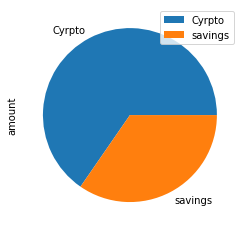

In [30]:
savings_df.plot.pie(y='amount', labels = ['Cyrpto', 'savings'])

In [31]:
if total_emergency_savings > ideal_emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
else:
    print("You need to get a second job!!! NOW!!!!")

Congratulations! You have enough money in your emergency fund.


In [ ]:
###Part 2 

In [32]:
api = tradeapi.REST(alpaca_api_key, alpaca_api_secret, api_version = "v2")

timeframe = "1D"

startdate = pd.Timestamp('2016-05-10', tz='America/New_York').isoformat()
enddate = pd.Timestamp('2021-05-10', tz='America/New_York').isoformat()

tickers = ["SPY","AGG"]

monte_ticker = api.get_barset(tickers, timeframe, start=startdate, end=enddate, limit=1000,).df
monte_ticker

AGG                                           \
                             open      high       low     close     volume   
time                                                                         
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.5500  1873534.0   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.5250  1345002.0   
2017-05-22 00:00:00-04:00  109.43  109.4800  109.4000  109.4400  1199164.0   
2017-05-23 00:00:00-04:00  109.50  109.5300  109.2100  109.2400  1194872.0   
2017-05-24 00:00:00-04:00  109.25  109.5000  109.2115  109.4500  2325960.0   
...                           ...       ...       ...       ...        ...   
2021-05-04 00:00:00-04:00  114.55  114.7000  114.4100  114.5285  4677045.0   
2021-05-05 00:00:00-04:00  114.45  114.6200  114.4222  114.6100  3861137.0   
2021-05-06 00:00:00-04:00  114.55  114.7100  114.5300  114.6500  4557111.0   
2021-05-07 00:00:00-04:00  114.85  114.9700  114.5700  114.6450  6812067.0   
2021-05-10 00:00:00-04:00  114.61  114.7200  114.4000  114.4300  4737416.0   

                              SPY                                        
                             open     high      low   close      volume  
time                                                                     
2017-05-18 00:00:00-04:00     NaN      NaN      NaN     NaN         NaN  
2017-05-19 00:00:00-04:00  237.33  239.080  237.270  238.30  69366163.0  
2017-05-22 00:00:00-04:00  238.90  239.710  238.820  239.53  37630972.0  
2017-05-23 00:00:00-04:00  239.95  240.240  239.510  240.02  36771135.0  
2017-05-24 00:00:00-04:00  240.32  240.730  239.930  240.59  37423590.0  
...                           ...      ...      ...     ...         ...  
2021-05-04 00:00:00-04:00  416.08  416.600  411.670  415.64  88484568.0  
2021-05-05 00:00:00-04:00  417.38  417.630  414.940  415.72  51316402.0  
2021-05-06 00:00:00-04:00  415.83  419.210  413.675  419.08  65397203.0  
2021-05-07 00:00:00-04:00  419.89  422.815  419.160  422.09  58002195.0  
2021-05-10 00:00:00-04:00  422.50  422.740  417.810  417.98  72076213.0  

[1001 rows x 10 columns]

In [33]:
from MCForecastTools import MCSimulation

In [34]:
mc_fiveyear = MCSimulation(monte_ticker, [0.6,0.4], 500, 252*30)

In [35]:
mc_fiveyear.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534.0   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.525  1345002.0   
2017-05-22 00:00:00-04:00  109.43  109.4800  109.4000  109.440  1199164.0   
2017-05-23 00:00:00-04:00  109.50  109.5300  109.2100  109.240  1194872.0   
2017-05-24 00:00:00-04:00  109.25  109.5000  109.2115  109.450  2325960.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-18 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-05-19 00:00:00-04:00    -0.000228  237.33  239.08  237.27  238.30   
2017-05-22 00:00:00-04:00    -0.000776  238.90  239.71  238.82  239.53   
2017-05-23 00:00:00-04:00    -0.001827  239.95  240.24  239.51  240.02   
2017-05-24 00:00:00-04:00     0.001922  240.32  240.73  239.93  240.59   

                                                    
                               volume daily_return  
time                                                
2017-05-18 00:00:00-04:00         NaN          NaN  
2017-05-19 00:00:00-04:00  69366163.0          NaN  
2017-05-22 00:00:00-04:00  37630972.0     0.005162  
2017-05-23 00:00:00-04:00  36771135.0     0.002046  
2017-05-24 00:00:00-04:00  37423590.0     0.002375

In [36]:
mc_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000002,0.994275,1.004727,0.998649,1.000581,1.000595,1.004801,0.993870,0.997643,1.001387,...,1.007865,0.999008,0.999128,0.998171,0.996298,0.987039,0.994781,0.998046,1.002850,1.002869
2,1.014115,0.991532,1.002221,1.002634,0.996947,1.005344,1.009089,0.986306,0.994359,0.994964,...,1.012700,0.997825,1.000155,0.990724,1.007382,0.986679,0.993330,0.991414,1.008878,1.005994
3,1.026732,0.987910,0.999403,1.003475,0.995115,1.003495,1.000693,0.986309,0.998147,1.001420,...,1.007407,1.006901,0.998737,0.987578,1.013174,0.984848,1.000395,0.994991,1.004848,1.008981
4,1.024137,0.988169,0.995396,1.010158,1.006232,0.998704,1.007041,0.984725,0.985800,1.005558,...,1.009409,1.010175,1.004487,0.993086,1.014616,0.989265,1.002506,0.989930,1.007060,1.006533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.108205,9.839495,5.312170,8.224649,6.902174,3.698718,4.927066,17.983236,9.995180,7.731656,...,14.245539,6.836646,7.883121,8.243513,13.560817,4.621596,12.025828,9.181782,8.247986,11.955979
7557,8.106021,9.826971,5.295137,8.226069,6.905617,3.704067,4.946428,17.941040,10.042494,7.676336,...,14.224339,6.863969,7.943156,8.191024,13.658603,4.645604,12.123846,9.153433,8.309939,11.947575
7558,8.088408,9.807185,5.359842,8.174431,6.952572,3.711367,4.936637,17.973834,10.098244,7.629695,...,14.229645,6.904364,8.004916,8.177308,13.670510,4.655091,12.020524,9.169666,8.379202,12.004700
7559,8.042627,9.702226,5.382910,8.197449,6.944943,3.674409,4.931664,17.871292,10.061823,7.617596,...,14.192777,6.866830,7.971510,8.232670,13.684175,4.664928,12.045613,9.171336,8.390447,11.951444


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

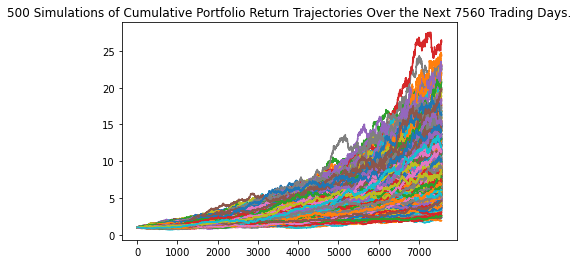

In [37]:
mc_fiveyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

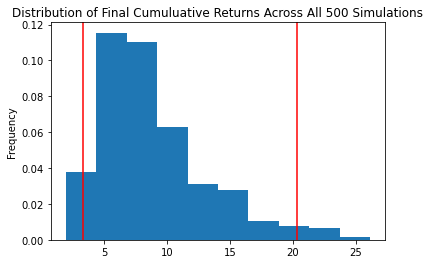

In [38]:
mc_fiveyear.plot_distribution()

In [39]:
mc_fiveyear.summarize_cumulative_return()

count           500.000000
mean              8.864402
std               4.309893
min               1.919926
25%               5.652186
50%               7.978247
75%              11.009930
max              26.166360
95% CI Lower      3.297450
95% CI Upper     20.356410
Name: 7560, dtype: float64

In [40]:
ci_lower = mc_fiveyear.summarize_cumulative_return()[8]
ci_lower

3.2974495626794917

In [41]:
ci_upper = mc_fiveyear.summarize_cumulative_return()[9]
ci_upper

20.35641049764199

In [42]:
initial_investment = 20000
ci_lower = ci_lower*initial_investment
ci_upper = ci_upper*initial_investment

In [43]:
f"there is 95% chance that my intital investment of {initial_investment} is going to to be between {ci_lower} and {ci_upper}, holding all else constant and given alpha level of 5%"

'there is 95% chance that my intital investment of 20000 is going to to be between 65948.99125358983 and 407128.20995283977, holding all else constant and given alpha level of 5%'